In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [16]:
# allow to see the output on the current browser
%matplotlib inline 

# before read file with pd.read_csv, NPS file should be saved as 'CSV utf-8' format in excel window
df = pd.read_csv("data/NPS_National_Pension_subscriber_details_20201023_utf8.csv")

# df.head()

,자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영),사업장명,사업자등록번호,사업장가입상태코드 1:등록2:탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1:법인2:개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수(고지인원 수 포함),당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준)),신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영)),상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)
0,Sep-20,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,5,792720,0,0
1,Sep-20,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,14,3566460,1,0
2,Sep-20,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,13,4408620,0,0
3,Sep-20,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,28,5575460,0,1
4,Sep-20,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,491,207015760,0,7


In [19]:
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [25]:
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',
          ]

In [26]:
len(df.columns)

22

In [27]:
len(columns)

22

In [29]:
df.columns = columns
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,...,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실
0,Sep-20,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,5,792720,0,0
1,Sep-20,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,14,3566460,1,0
2,Sep-20,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,13,4408620,0,0
3,Sep-20,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,28,5575460,0,1
4,Sep-20,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,491,207015760,0,7


In [31]:
df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액']]
df_main.head()

,사업장명,가입자수,신규,상실,고지금액
0,우성기전(주),5,0,0,792720
1,서능공원묘지운영회(재),14,1,0,3566460
2,노들새마을금고,13,0,0,4408620
3,유창성업(주),28,0,1,5575460
4,희성전자(주),491,0,7,207015760


In [32]:
df_main['신규'].mean()

1.029088832820228

In [33]:
df_main['상실'].mean()

0.5906151863768586

In [34]:
df_main['가입자수'].mean()

19.7560434557842

In [35]:
df_main['고지금액'].mean()

5680702.493152165

In [37]:
df_main['인당고지금액'] = df_main['고지금액'] / df_main['가입자수']
df['인당고지금액'] = df['고지금액'] / df['가입자수']
df_main['인당고지금액'].head()

0   158544.00
1   254747.14
2   339124.62
3   199123.57
4   421620.69
Name: 인당고지금액, dtype: float64

In [42]:
# mean salary per month = NP per a person / 9%

df_main['평균월급'] = df_main['인당고지금액'] / 9 * 100
df['평균월급'] = df['인당고지금액'] / 9 * 100

# mean salary per year = mean salary per month *12

df_main['평균연봉'] = df_main['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

df_main.head()

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
0,우성기전(주),5,0,0,792720,158544.00,1761600.00,21139200.00
1,서능공원묘지운영회(재),14,1,0,3566460,254747.14,2830523.81,33966285.71
2,노들새마을금고,13,0,0,4408620,339124.62,3768051.28,45216615.38
3,유창성업(주),28,0,1,5575460,199123.57,2212484.13,26549809.52
4,희성전자(주),491,0,7,207015760,421620.69,4684674.36,56216092.33


In [44]:
# Number of company mean salary per month calculated
df_main['평균월급'].notnull().sum()

495116

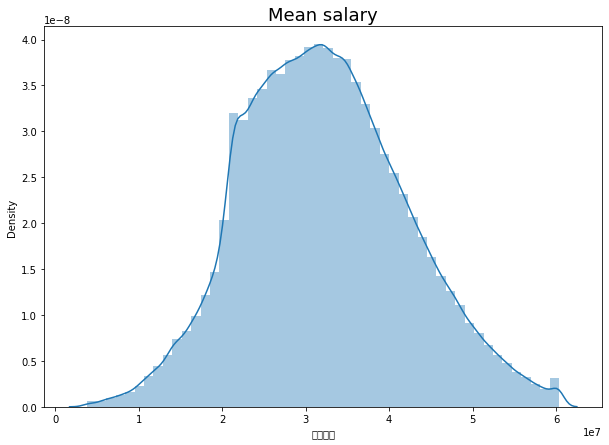

In [51]:
plt.figure(figsize = (10,7))
sns.distplot(df_main.loc[df_main['평균연봉'].notnull(), '평균연봉'])
plt.title('Mean salary', fontsize=18)
plt.show()

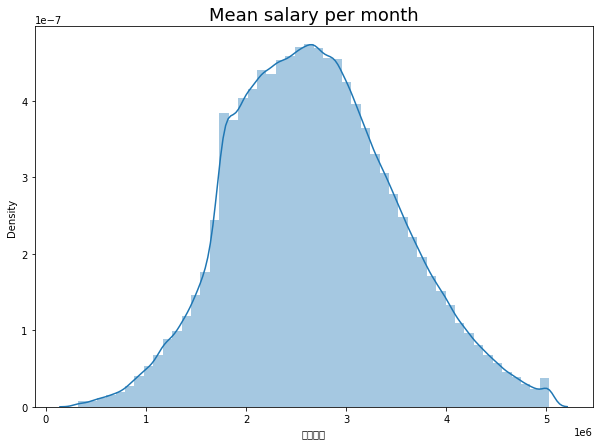

In [52]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['평균월급'].notnull(), '평균월급'])
plt.title('Mean salary per month', fontsize=18)
plt.show()